<a href="https://colab.research.google.com/github/Elman295/CIFAR10/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR10 classification with KNN

In [43]:
import tensorflow_datasets as tfds
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

x_train, y_train = tfds.as_numpy(tfds.load("cifar10", split = "train", batch_size=-1, as_supervised=True))
x_test, y_test = tfds.as_numpy(tfds.load("cifar10", split = "test", batch_size= -1, as_supervised= True))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteOG7RBI/cifar10-train.tfrecord*...:   0%|          | 0/…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar10/3.0.2.incompleteOG7RBI/cifar10-test.tfrecord*...:   0%|          | 0/1…

Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


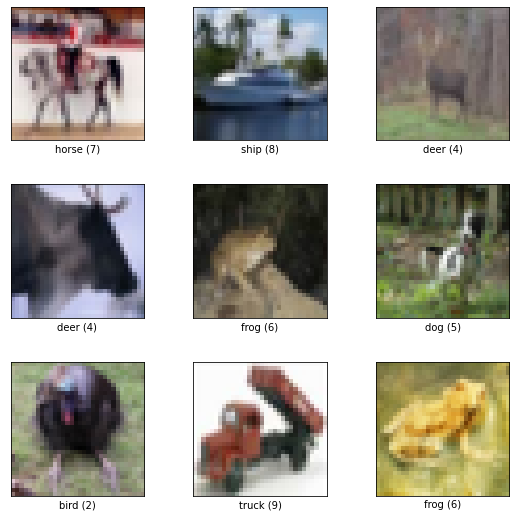

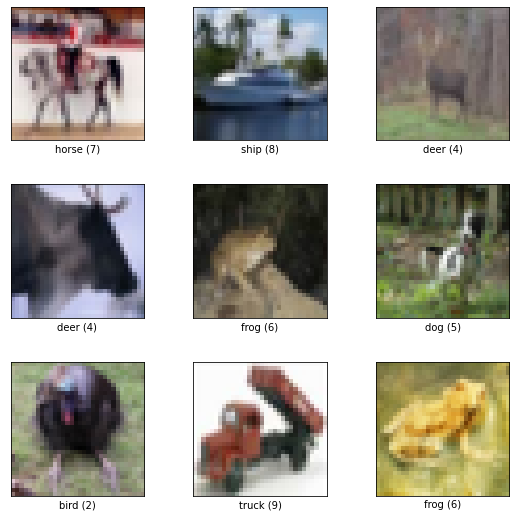

In [4]:
data, info = tfds.load("cifar10", split = "train", with_info=True)
samples = data.take(10)
tfds.show_examples(samples, info)

In [5]:
x_train = x_train.reshape(-1,32*32*3)
x_test = x_test.reshape(-1,32*32*3)

In [18]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
print(model.score(x_train[:1000],y_train[:1000]))
print(model.score(x_test[:1000], y_test[:1000]))

1.0
0.369


Finding the best K

In [26]:
train_accuracy = []
test_accuracy = []

for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  train_accuracy.append(model.score(x_train[:100],y_train[:100]))
  test_accuracy.append(model.score(x_test[:100],y_test[:100]))




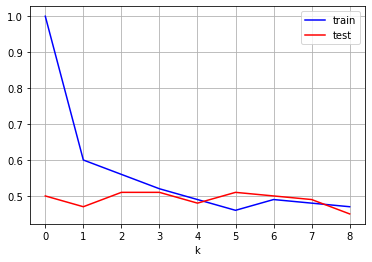

In [27]:
plt.plot(train_accuracy, color = "blue", label= "train")
plt.plot(test_accuracy, color = "red", label = "test")
plt.legend()
plt.grid()
plt.xlabel("k")
plt.show()

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
print(model.score(x_train[:1000],y_train[:1000]))
print(model.score(x_test[:1000], y_test[:1000]))

0.496
0.353


In [36]:
x_test = x_test.reshape(-1,32*32*3)

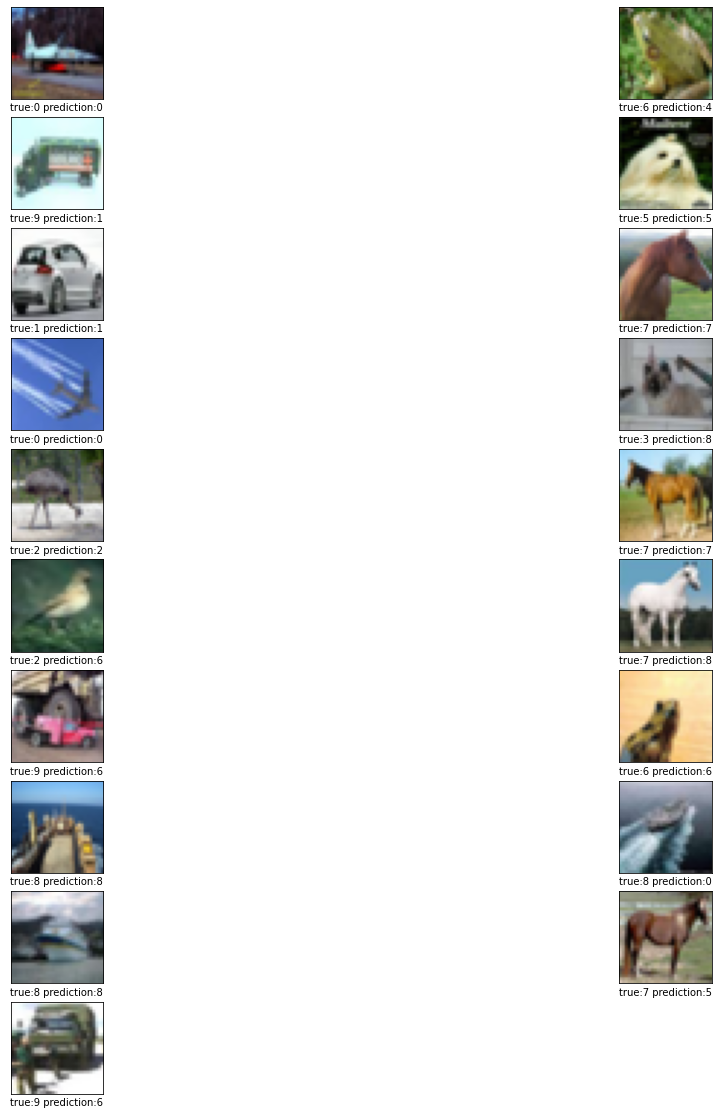

In [42]:
prediction = model.predict(x_test[:100])
x_test_show = x_test.reshape(-1,32,32,3)
plt.figure(figsize=(20,20))

for i in range(1,20):
  plt.subplot(10,2,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test_show[i])
  plt.xlabel(f"true:{y_test[i]} prediction:{prediction[i]}")
  x_test = x_test.reshape(-1,32*32*3)


In [44]:
cm = confusion_matrix(y_test[:100],prediction)
cm

array([[9, 0, 2, 1, 0, 0, 0, 1, 2, 0],
       [0, 4, 1, 0, 2, 0, 2, 0, 3, 0],
       [0, 0, 8, 0, 3, 0, 2, 0, 0, 0],
       [0, 0, 1, 3, 1, 2, 1, 0, 1, 0],
       [0, 0, 1, 0, 2, 0, 0, 0, 1, 0],
       [1, 0, 1, 2, 1, 7, 1, 0, 1, 0],
       [0, 0, 0, 0, 3, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 2, 1, 0, 5, 1, 0],
       [5, 0, 0, 0, 0, 0, 0, 0, 9, 0],
       [1, 1, 0, 0, 0, 0, 2, 0, 1, 0]])

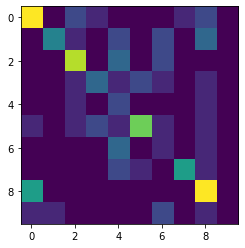

In [45]:
plt.imshow(cm)
plt.show()